# Decision Tree models with weather & holiday features on smoothed dataset
Compare to Model-v0.21-DT_holidays_smoothed notebook

In [8]:
from BorderModel import BorderData, clean_df_subset, create_dummies
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from dbhelper import pd_query

In [12]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofmonth,
            week,
            dayofweek,
            minofday,
            newyears,
            us_mlk,
            us_washington,
            us_memorial,
            us_independence,
            us_columbus,
            us_veterans,
            us_thanksgiving,
            xmas,
            ca_goodfriday,
            ca_victoria,
            ca_canada,
            ca_civic,
            ca_thanksgiving,
            ca_boxing,
            ca_family,
            temp_max,
            temp_mean,
            temp_min,
            viz_max,
            wind_max,
            precip,
            rain,
            snow,
            fog,
            thunderstorm
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join weather w on c.date::timestamp::date = w.date
        where
            crossing_id = 1
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df30 = pd_query(query)

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

## RF with all features - No improvement compared to without weather features

OOB:  0.875808153738
Best score:  0.559271427605
** MSE for last cv fold **
Baseline :  96.154008876
Model    :  111.535852915
** R^2 for last cv fold **
Baseline :  0.15028243136
Model    :  0.0143523409697
** Explained variance for last cv fold **
Baseline :  0.305474073834
Model    :  0.229615139933


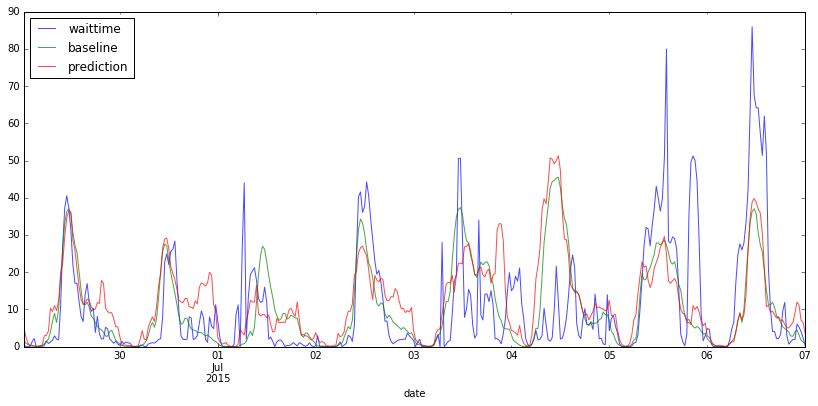

In [19]:
data = BorderData(df30)

model = RandomForestRegressor(n_jobs=-1, n_estimators=100, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)
data.plot('6/29/15', '7/7/15');

##  GBR - slight decline in performance with weather features

Best score:  0.580122343625
** MSE for last cv fold **
Baseline :  96.154008876
Model    :  101.109590844
** R^2 for last cv fold **
Baseline :  0.15028243136
Model    :  0.10648971684
** Explained variance for last cv fold **
Baseline :  0.305474073834
Model    :  0.292702449084


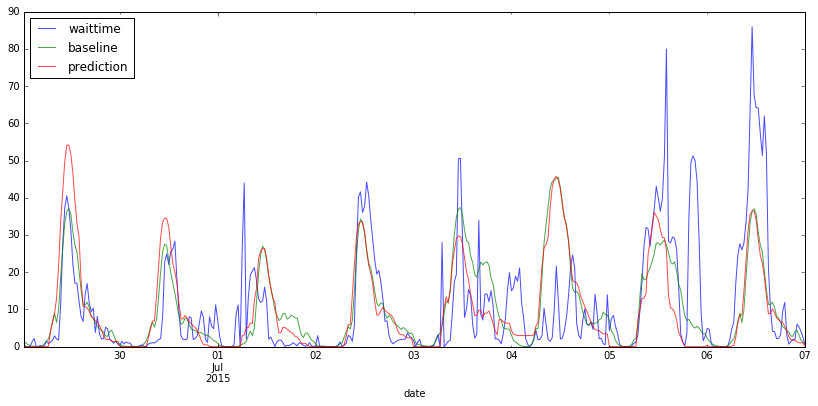

In [16]:
model = GradientBoostingRegressor(subsample=.2, n_estimators=300)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)
data.plot('6/29/15', '7/7/15');

In [17]:
print data.X.columns.values[np.argsort(grid.best_estimator_.feature_importances_)[::-1]]
print sorted(grid.best_estimator_.feature_importances_)[::-1]

['minofday' 'week' 'dayofweek' 'year' 'dayofmonth' 'temp_min' 'temp_max'
 'temp_mean' 'wind_max' 'precip' 'us_veterans' 'month' 'ca_goodfriday'
 'ca_boxing' 'ca_canada' 'us_mlk' 'snow' 'us_memorial' 'us_washington'
 'xmas' 'fog' 'ca_civic' 'us_independence' 'us_thanksgiving' 'thunderstorm'
 'ca_victoria' 'viz_max' 'rain' 'newyears' 'us_columbus' 'ca_thanksgiving'
 'ca_family']
[0.40830530015079991, 0.10328511057033231, 0.080709213362806273, 0.056480873992843475, 0.053169680784757603, 0.051106348369610248, 0.035183032737252103, 0.034351296349295929, 0.033430018421941807, 0.029316099068012746, 0.020464091659648954, 0.01821625926584531, 0.014236532234269662, 0.011854647121161426, 0.0086966321993776838, 0.0058830126037640257, 0.005443442717044558, 0.0049812714463154141, 0.0048982246513541274, 0.0041553003150591305, 0.0032102417224222097, 0.0030318110562850874, 0.0026558528327230721, 0.0026436704264314274, 0.0014306063355089597, 0.0011168615563412925, 0.00096523474778927346, 0.0004937376408

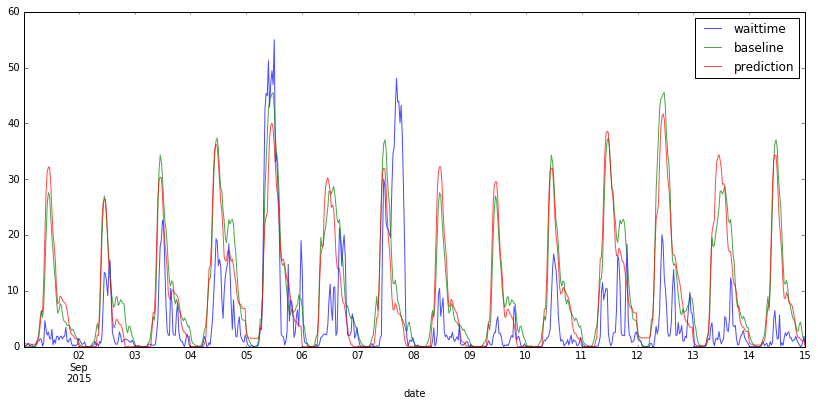

In [18]:

data.plot('9/1/15', '9/15/15');

## Conclusions
* 